In [2]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import numpy as np

### Cleaning values

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
a=pd.read_csv('seattle.csv')
a.head()

,org_name,site_name,latitude,longitude,elevation,measured_on,air temp monthlies:averaged month,air temp monthlies:number of days reported,air temp monthlies:number of obs,air temp monthlies:maximum temp (deg C),...,dissolved oxygens:measured at,dissolved oxygens:water body state,dissolved oxygens:dissolved oxygen via kit (mgl),dissolved oxygens:dissolved oxygen via probe (mgl),dissolved oxygens:salinity via dokit (ppt),dissolved oxygens:oxygen kit mfg,dissolved oxygens:oxygen kit model,dissolved oxygens:oxygen probe mfg,dissolved oxygens:oxygen probe model,dissolved oxygens:comments
0,Blue Heron Middle School,School Location:BIO-01,48.1172,-122.7592,32.0,1997-03-06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chief Kamiakin School,School Location:ATM-01,46.3165,-119.9953,243.0,2000-10-01,2000-10-01,31.0,31.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chief Kamiakin School,School Location:ATM-01,46.3165,-119.9953,243.0,2000-11-01,2000-11-01,28.0,28.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chief Kamiakin School,School Location:ATM-01,46.3165,-119.9953,243.0,2001-02-01,2001-02-01,23.0,23.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chief Kamiakin School,School Location:ATM-01,46.3165,-119.9953,243.0,2001-05-01,2001-05-01,25.0,25.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
a.isnull().sum()

org_name                                                    0
 site_name                                                  0
 latitude                                                   0
 longitude                                                  0
 elevation                                                  0
 measured_on                                                0
 air temp monthlies:averaged month                        163
air temp monthlies:number of days reported                163
air temp monthlies:number of obs                          163
air temp monthlies:maximum temp (deg C)                   163
air temp monthlies:minimum temp (deg C)                   163
air temp monthlies:average temp (deg C)                   163
humidity monthlies:averaged month                         295
humidity monthlies:number of days reported                295
humidity monthlies:number of obs                          295
humidity monthlies:max relative humidity (%)              295
humidity

In [9]:
a.columns

Index(['org_name', ' site_name', ' latitude', ' longitude', ' elevation',
       ' measured_on', ' air temp monthlies:averaged month',
       'air temp monthlies:number of days reported',
       'air temp monthlies:number of obs',
       'air temp monthlies:maximum temp (deg C)',
       'air temp monthlies:minimum temp (deg C)',
       'air temp monthlies:average temp (deg C)',
       'humidity monthlies:averaged month',
       'humidity monthlies:number of days reported',
       'humidity monthlies:number of obs',
       'humidity monthlies:max relative humidity (%)',
       'humidity monthlies:min relative humidity (%)',
       'humidity monthlies:average relative humidity (%)',
       'humidity monthlies:maximum dewpoint (deg C)',
       'humidity monthlies:minimum dewpoint (deg C)',
       'humidity monthlies:average dewpoint (deg C)',
       'vegatation covers:measured on',
       'vegatation covers:canopy cover observations count',
       'vegatation covers:canopy cover plus coun

In [10]:
a[' latitude'].dtype

dtype('float64')

In [13]:
a.rename(columns=lambda x: x.strip(), inplace=True)

In [15]:
a.latitude=a.latitude.astype('str')

In [17]:
a.longitude=a.longitude.astype('str')

In [18]:
a.to_csv('seattle_download.csv',index=False)

In [21]:
b=pd.read_csv('ghcn_site_detail.csv')

In [24]:
def myfillna(series):
    if series.dtype is pd.np.dtype(int):
        return series.fillna('')
    elif series.dtype is pd.np.dtype(float):
        return series.fillna('')
    else:
        return series.fillna('NA')
    

In [25]:
b=b.apply(myfillna)

In [27]:
c=pd.read_csv('ghcn_daily.csv')

In [28]:
c=c.apply(myfillna)

In [29]:
c.columns

Index(['station_id', 'date', 'temperature_c'], dtype='object')

In [31]:
df=pd.merge(b,c,on='station_id')

In [34]:
df.head(5)

,station_id,station_name,latitude,longitude,elevation_m,country,date,temperature_c
0,2799,Missing Station ID - AQ000914188,-999.0,-999.0,-999.0,American Samoa [United States],1955.458,25.920
1,2799,Missing Station ID - AQ000914188,-999.0,-999.0,-999.0,American Samoa [United States],1955.542,25.627
2,2799,Missing Station ID - AQ000914188,-999.0,-999.0,-999.0,American Samoa [United States],1955.625,26.197
3,2799,Missing Station ID - AQ000914188,-999.0,-999.0,-999.0,American Samoa [United States],1955.708,24.230
4,2799,Missing Station ID - AQ000914188,-999.0,-999.0,-999.0,American Samoa [United States],1955.792,23.761


In [35]:
df.to_csv('df_climate.csv',index=False)

In [37]:
climate=pd.read_csv('jena_climate_2009_2016.csv')

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [46]:
climate.rename(columns=lambda x: x.strip(), inplace=True)

In [40]:
climate.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [ ]:
#Remove NON ASCII characters
climate.iloc[:,1]=climate.iloc[:,1].str.replace('[^a-zA-Z]', ' ')
climate.iloc[:,2]=climate.iloc[:,2].str.replace('[^a-zA-Z]', ' ')
climate.iloc[:,4]=climate.iloc[:,4].str.replace('[^a-zA-Z]', ' ')
climate.iloc[:,5]=climate.iloc[:,5].str.replace('[^a-zA-Z]', ' ')
climate.iloc[:,6]=climate.iloc[:,6].str.replace('[^a-zA-Z]', ' ')
climate.iloc[:,7]=climate.iloc[:,7].str.replace('[^a-zA-Z]', ' ')
climate.iloc[:,8]=climate.iloc[:,8].str.replace('[^a-zA-Z]', ' ')


In [93]:
import string

In [98]:
climate.a.dtype

dtype('O')

In [ ]:
#Remove unnecessary punctuations
climate.iloc[:,1] = climate.iloc[:,1].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))
climate.iloc[:,2] = climate.iloc[:,2].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))
climate.iloc[:,4] = climate.iloc[:,4].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))
climate.iloc[:,5] = climate.iloc[:,5].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))
climate.iloc[:,6] = climate.iloc[:,6].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))
climate.iloc[:,7] = climate.iloc[:,7].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))
climate.iloc[:,8] = climate.iloc[:,8].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation]))


In [99]:
climate.a=pd.to_datetime(climate.a)

Text(0.5,0,'Air density')

Text(0,0.5,'Month of the year')

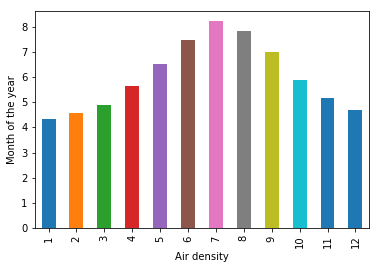

In [108]:
climate.groupby(climate.a.dt.month).j.mean().plot(kind='bar')
plt.xlabel('Air density')
plt.ylabel('Month of the year')

## Fitting model

In [41]:
from scipy.stats import ttest_ind

In [42]:
import statsmodels.formula.api as smf
import random

In [47]:
climate.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [55]:
new_cols=['a','b','y','d','e','f','g','h','i','j','k','l','m','n','o']
climate.rename(columns=dict(zip(climate.columns[0:], new_cols)),inplace=True)

In [86]:
smf.ols(formula = 'y~h', data=climate).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                 1.281e+06
Date:                Sun, 21 Oct 2018   Prob (F-statistic):               0.00
Time:                        03:47:34   Log-Likelihood:            -1.1990e+06
No. Observations:              420551   AIC:                         2.398e+06
Df Residuals:                  420549   BIC:                         2.398e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.2030      0.016   -448.289      0.000      -7.235      -7.172
h              1.7468      0.002   1131.853      0.000       1.744       1.750
==============================================================================
Omnibus:                    40371.126   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58784.766
Skew:                           0.751   Prob(JB):                         0.00
Kurtosis:                       4.047   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
#Water vapour pressure deficit
smf.ols(formula = 'y~i', data=climate).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                 5.814e+05
Date:                Sun, 21 Oct 2018   Prob (F-statistic):               0.00
Time:                        03:58:14   Log-Likelihood:            -1.3104e+06
No. Observations:              420551   AIC:                         2.621e+06
Df Residuals:                  420549   BIC:                         2.621e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1533      0.011    380.607      0.000       4.132       4.175
i              1.3103      0.002    762.473      0.000       1.307       1.314
==============================================================================
Omnibus:                    18406.648   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23680.791
Skew:                          -0.459   Prob(JB):                         0.00
Kurtosis:                       3.712   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
#Humidity
#Air density
#Water vapour concentration
#Water vapour pressure deficit
m=smf.ols(formula = 'y~j+k+l+i', data=climate).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 3.760e+06
Date:                Sun, 21 Oct 2018   Prob (F-statistic):               0.00
Time:                        04:29:15   Log-Likelihood:            -7.3501e+05
No. Observations:              420551   AIC:                         1.470e+06
Df Residuals:                  420546   BIC:                         1.470e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.8952      0.210    466.449      0.000      97.484      98.307
j           -134.9316      0.394   -342.373      0.000    -135.704    -134.159
k             85.3981      0.248    344.838      0.000      84.913      85.884
l             -0.0832      0.000   -523.364      0.000      -0.084      -0.083
i              0.5301      0.001    752.461      0.000       0.529       0.531
==============================================================================
Omnibus:                    26128.697   Durbin-Watson:                   0.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54156.986
Skew:                          -0.430   Prob(JB):                         0.00
Kurtosis:                       4.533   Cond. No.                     2.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### As these variables have the highest R^2 squared value which is 0.976, these features can be selected for the prediction of futuristic climate values.

In [109]:
climate.head(4)

,a,b,y,d,e,f,g,h,i,j,k,l,m,n,o
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0


In [112]:
climate.dtypes

a    datetime64[ns]
b           float64
y           float64
d           float64
e           float64
f           float64
g           float64
h           float64
i           float64
j           float64
k           float64
l           float64
m           float64
n           float64
o           float64
dtype: object

In [116]:
n=m.predict()
len(n)

420551

In [120]:
#Error rate in predictions
error=(n-climate.y)/100
error

0         0.018423
1         0.011171
2         0.016705
3         0.012793
4         0.021091
5         0.017106
6         0.009100
7         0.014098
8         0.011433
9         0.016336
10        0.017293
11        0.019299
12        0.022649
13        0.008923
14        0.018579
15        0.023577
16        0.006733
17        0.017238
18        0.008840
19        0.010727
20        0.010557
21        0.018711
22        0.017337
23        0.009214
24        0.021500
25        0.012175
26        0.020645
27        0.013346
28        0.006777
29        0.013915
            ...   
420521   -0.011964
420522   -0.008119
420523   -0.016206
420524   -0.013920
420525   -0.008998
420526   -0.010305
420527   -0.010203
420528   -0.012750
420529   -0.012044
420530   -0.016145
420531   -0.002361
420532   -0.008769
420533   -0.008113
420534   -0.012046
420535   -0.003931
420536   -0.012498
420537   -0.003742
420538   -0.015232
420539   -0.003881
420540   -0.004824
420541   -0.006621
420542    0.

In [121]:
error.mean()

-9.805504240030448e-15